Loss: 25673.060134720017
Loss: 849.5921635512217
Loss: 913.4009278429185
Loss: 936.9957886863034
Loss: 949.223235179053
Loss: 956.628490344005
Loss: 961.4546506119078
Loss: 964.7318418499382
Loss: 967.0045958505576
Loss: 968.584658441287


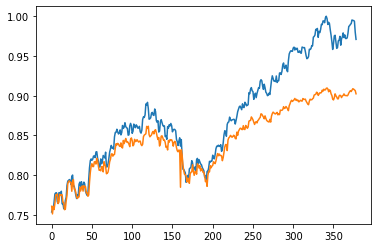

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
df = pd.read_csv("data.csv")
date = pd.DataFrame(df, columns=['Date']) 
open = pd.DataFrame(df, columns=['Open'])
open = open/np.amax(open, axis=0)
close = pd.DataFrame(df, columns=['Close'])
p = np.amax(close, axis=0)
close = close/np.amax(close, axis=0)
high = pd.DataFrame(df, columns=['High'])
high = high/np.amax(high, axis=0)
low = pd.DataFrame(df, columns=['Low'])
low = low/np.amax(low, axis=0)
X1 = result = pd.concat([open, high, low], axis=1)
X = np.array(X1)
y = np.array(close)
X2 = X[:50,:]
X = X[50:,:]
y1 = y[:50,:]
y = y[50:,:]

class NeuralNetwork(object):
  def __init__(self):
        #parameters
        self.inputSize = 3
        self.outputSize = 1
        self.hiddenSize1 = 4
        self.hiddenSize0 = 3
        #weights
        self.W0 = np.random.randn(self.inputSize, self.hiddenSize0)
        self.W1 = np.random.randn(self.hiddenSize0, self.hiddenSize1)
        self.W2 = np.random.randn(self.hiddenSize1, self.outputSize)
  def w0(self):
        return self.W0
  def w1(self):
        return self.W1
  def w2(self):
        return self.W2
  def sigmoid(self,s):
        return 1/(1 + np.exp(-s))
  def Feedforward(self,X):
        self.z = np.dot(X, self.W0)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.dot(self.z2, self.W1)
        self.z4 =  self.sigmoid(self.z3)
        self.z5 = np.dot(self.z4, self.W2)
        output = self.sigmoid(self.z5)
        return output
  def backp(self, X, y, output):
        delta_1 = np.array([])
        delta_0 = np.array([])
        delta_2 = np.array([])
        self.delta_2 = (output-y)*(output)*(1-output)
        self.z4_error = self.delta_2.dot(self.W2.T)
        self.delta_1 = self.z4_error * self.z4 * (1-self.z4) 
        self.z2_error = self.delta_1.dot(self.W1.T)
        self.delta_0 = self.z2_error * self.z2 * (1-self.z2)

        gw = (self.z4.T.dot(self.delta_2))
        gw = gw*(np.absolute(self.W2)**(-2/9))/math.gamma(7/9)
        self.W2 = self.W2 - 0.2*gw

        gw = (self.z2.T.dot(self.delta_1))
        gw = gw*(np.absolute(self.W1)**(-2/9))/math.gamma(7/9)
        self.W1 = self.W1 - 0.5*gw

        gw = (X.T.dot(self.delta_0))
        gw = gw*(np.absolute(self.W0)**(-2/9))/math.gamma(7/9)
        self.W0 = self.W0 - 0.5*gw

  def train(self, X, y):
       output = self.Feedforward(X)
       self.backp(X, y, output)
NN = NeuralNetwork()
for i in range(10000):
  if i%1000 == 0:
   print("Loss: " + str(np.mean((y.dot(p) - NN.Feedforward(X).dot(p))))) 
  NN.train(X, y)
plt.plot(y)
plt.plot(NN.Feedforward(X))

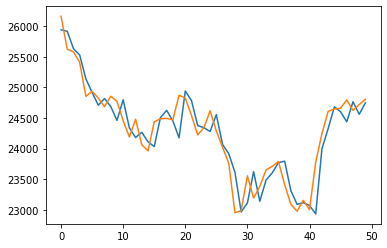

In [ ]:
plt.plot(NN.Feedforward(X2).dot(p))
plt.plot(y1.dot(p))

In [ ]:
print(NN.w0())

[[-6.15765731 -6.02393694 -1.85013113]
 [ 7.43136439  7.08229093 -2.04847222]
 [-6.71287576 -6.48265399 -1.88476604]]


In [ ]:
print(NN.w1())

[[-6.5655803  -9.22111731 -5.05422241  4.04173231]
 [-6.48075047 -7.78198968 -3.6935792   5.12616254]
 [-7.26950109 -7.28432222 -3.74281825  6.49925178]]


In [ ]:
print(NN.w2())

[[ 5.1315963 ]
 [ 6.29201514]
 [ 3.69194025]
 [-9.73751464]]


Loss: 1305.0219640203259


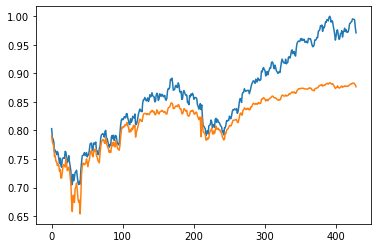

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")
date = pd.DataFrame(df, columns=['Date']) 
open = pd.DataFrame(df, columns=['Open'])
open = open/np.amax(open, axis=0)
close = pd.DataFrame(df, columns=['Close'])
p = np.amax(close, axis=0)
close = close/np.amax(close, axis=0)
high = pd.DataFrame(df, columns=['High'])
high = high/np.amax(high, axis=0)
low = pd.DataFrame(df, columns=['Low'])
low = low/np.amax(low, axis=0)
X1 = result = pd.concat([open, high, low], axis=1)
X = np.array(X1)
y = np.array(close)
class NeuralNetwork(object):
  def __init__(self):
        #parameters
        self.inputSize = 3
        self.outputSize = 1
        self.hiddenSize1 = 4
        self.hiddenSize0 = 3
        #weights
        self.W0 = np.random.randn(self.inputSize, self.hiddenSize0)
        self.W1 = np.random.randn(self.hiddenSize0, self.hiddenSize1)
        self.W2 = np.random.randn(self.hiddenSize1, self.outputSize)
  def w0(self):
        return self.W0
  def w1(self):
        return self.W1
  def w2(self):
        return self.W2
  def sigmoid(self,s):
        return 1/(1 + np.exp(-s))
  def Feedforward(self,X):
        self.z = np.dot(X, self.W0)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.dot(self.z2, self.W1)
        self.z4 =  self.sigmoid(self.z3)
        self.z5 = np.dot(self.z4, self.W2)
        output = self.sigmoid(self.z5)
        return output
  def backp(self, X, y, output):
        delta_1 = np.array([])
        delta_0 = np.array([])
        delta_2 = np.array([])
        self.delta_2 = (output-y)*(output)*(1-output)
        self.z4_error = self.delta_2.dot(self.W2.T)
        self.delta_1 = self.z4_error * self.z4 * (1-self.z4) 
        self.z2_error = self.delta_1.dot(self.W1.T)
        self.delta_0 = self.z2_error * self.z2 * (1-self.z2)

        gw = (self.z4.T.dot(self.delta_2))
        self.W2 = self.W2 - 0.2*gw

        gw = (self.z2.T.dot(self.delta_1))
        self.W1 = self.W1 - 0.5*gw

        gw = (X.T.dot(self.delta_0))
        self.W0 = self.W0 - 0.5*gw

  def train(self, X, y):
       output = self.Feedforward(X)
       self.backp(X, y, output)
NN = NeuralNetwork()
for i in range(10000):
  NN.train(X, y)
print("Loss: " + str(np.mean((y.dot(p) - NN.Feedforward(X).dot(p)))))
plt.plot(y)
plt.plot(NN.Feedforward(X))

In [ ]:
print(NN.w0())

[[ 0.21624221 -0.0887977  -0.86926152]
 [-1.05877066 -0.66890667  1.06988777]
 [-4.39915251 -4.5723013  -5.55748262]]


In [ ]:
print(NN.w1())

[[-11.12546284  -9.01845046 -14.82203834  -5.74062387]
 [-10.69952388  -9.00301099 -15.04504517  -4.32470182]
 [-10.75135009  -7.54324104 -15.30376614  -4.33604424]]


In [ ]:
print(NN.w2())

[[ 2.44017606]
 [-0.14229295]
 [ 6.88701811]
 [-4.33843436]]
